In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("data.csv")

In [3]:
print(df.shape)
print(df.head())
df["diagnosis"].value_counts()

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

diagnosis
B    357
M    212
Name: count, dtype: int64

In [4]:
df= df.drop(columns=["id","Unnamed: 32"])
x=df.drop(columns=["diagnosis"])
y=df["diagnosis"]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

ss=StandardScaler()
x=ss.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [5]:
model=KNeighborsClassifier(n_neighbors=5)

In [6]:
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [7]:
ypred=model.predict(xtest)

In [8]:
accuracy_score(ytest,ypred)

0.9736842105263158

In [9]:
acc=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    acc.append(accuracy_score(ytest,knn.predict(xtest)))

In [10]:
acc

[0.9649122807017544,
 0.9736842105263158,
 0.9824561403508771,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

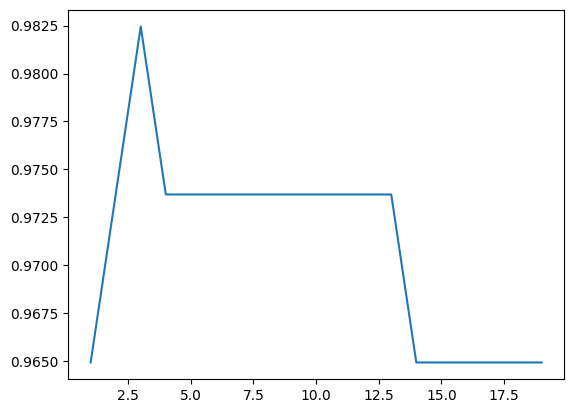

In [11]:
sns.lineplot(x=np.arange(1,20),y=acc)
plt.show()